In [15]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

datasets = load_dataset('lukebarousse/data_jobs')

df = datasets['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

In [16]:
df_skills = df.explode('job_skills').copy() 

skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count


,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [17]:
titles = df_skills_count['job_title_short'].unique().tolist()
titles = titles[:3]

titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

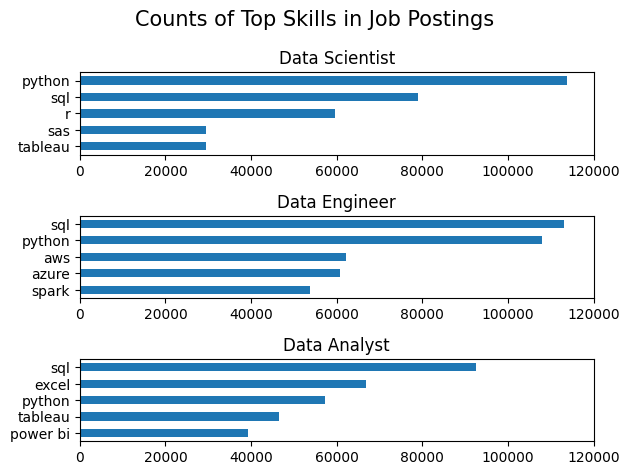

In [18]:
fig, ax = plt.subplots(len(titles),1)

for i,titles in enumerate(titles):
    df_skills_count[df_skills_count['job_title_short'] == titles].head(5).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=titles)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()